In [49]:
from scipy.stats import expon as ex
import scipy.stats as sps
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# ЗАДАЧА 1

In [37]:
def func(n,m,lamb):
    ar_t = ex(scale = 1/lamb).rvs(size = n)
    arrival_times = []
    for i in range(n):
        if i == 0:
            arrival_times.append(ar_t[i])
        else:
            arrival_times.append(ar_t[i]+arrival_times[i-1])
    arrival_times = np.array(arrival_times)
    f = lambda x: len(arrival_times[arrival_times < x])
    plt.figure(figsize = (18,13))
    t = np.linspace(1,max(arrival_times+1),m)
    a = []
    for i in range(m):
        a.append(f(t[i])/t[i])
    b = [lamb]*m
    plt.plot(t,a)
    plt.plot(t,b)
    plt.show()

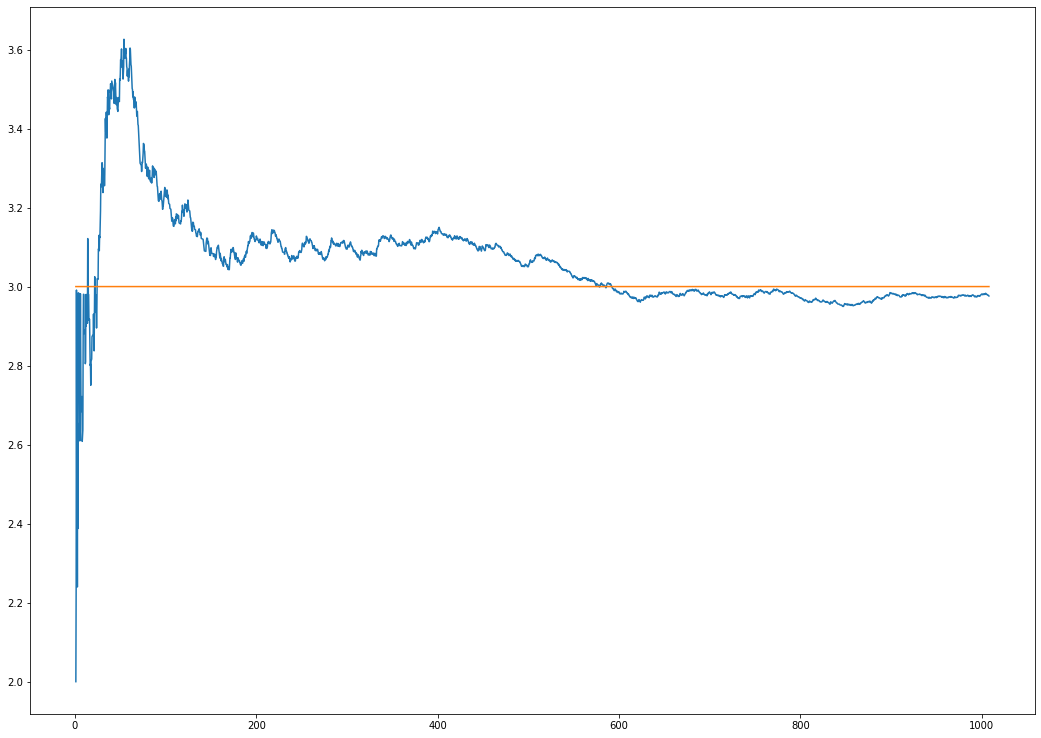

In [38]:
func(3000,3000,3)

# ЗАДАЧА 2

In [58]:
def find_pose(t,b,n):
    for i in range(n):
        if t < b[i]:
            return b[i] - t

In [73]:
n = 10000
lamb = 3
ar_t = ex(scale = 1/lamb).rvs(size = n)
arrival_times = []
for i in range(n):
    if i == 0:
        arrival_times.append(ar_t[i])
    else:
        arrival_times.append(ar_t[i]+arrival_times[i-1])

In [74]:
m = 10000
t = sps.uniform.rvs(size = m)
exc = []
for i in range(m):
    exc.append(find_pose(t[i]*max(arrival_times),arrival_times,n))

0.33220727846400716


/home/andrei/jupiter/jupiter/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


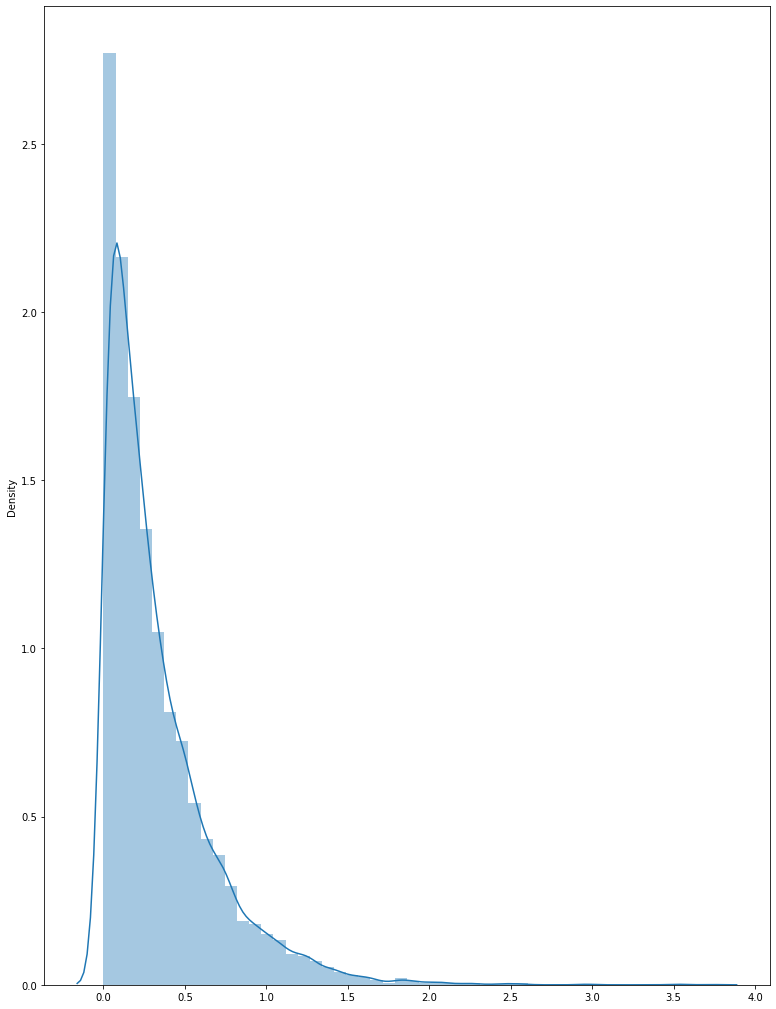

In [75]:
print(np.mean(exc))
plt.figure(figsize = (13,18))
sns.distplot(exc)
plt.show()